## Regression with ARIMA Errors in R

You have the quarterly GDP data for Mexico. Estimate and interpret a linear regression model with ARIMA errors, with the following considerations:

    a) For the regression matrix, include: intercept, trend, and quarterly seasonality.

    b) Consider adding dummy variables for the outlier observations related to economic crises.

    c) Determine the appropriate order of the ARMA(p,q) model for the errors.

- Interpret the coefficients of the fitted model, both from the regression part and the ARMA(p,q).
- What effect does isolating or not isolating the economic crises have on the interpretation of the coefficients?
- Generate a forecast for the next 3 years on a quarterly basis.

In [15]:
library(readxl)
library(ggplot2)
library(dplyr)
library(forecast)
library(lmtest) # load libraries

In [14]:
path = "/home/aspphem/Desktop/MCE/StatisticalComputing/Q1/PIB_Trimestral.xlsx" # file path
data <- read_excel(path, sheet = "PIB") # read xlsx file

In [17]:
head(data)

Año,Trimestre,PIB
<dbl>,<chr>,<dbl>
1980,T1,46.44867
1980,T2,46.37874
1980,T3,46.02343
1980,T4,49.28428
1981,T1,50.64149
1981,T2,51.80214


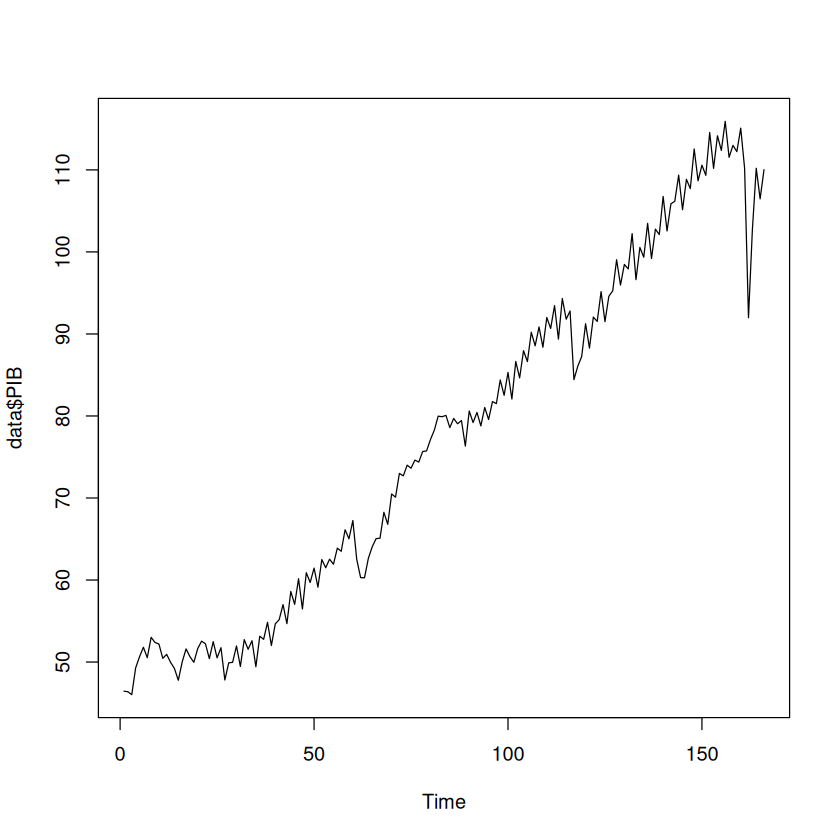

In [18]:
ts.plot(data$PIB) # plotting time series

In [19]:
n <- length(data$PIB)
X <- rep(1, n) # intercept

In [20]:
pib_ts <- ts(data$PIB, start = c(1980, 1), frequency = 4) 
t <- seq_along(pib_ts) # tendency variable

In [21]:
data$T1 <- ifelse(data$Trimestre == "T1", 1, 0)
data$T2 <- ifelse(data$Trimestre == "T2", 1, 0)
data$T3 <- ifelse(data$Trimestre == "T3", 1, 0) # dummy variables for seasonality

In [22]:
data$crisis_1995 <- ifelse(data$Año == 1995, 1, 0)
data$crisis_2009 <- ifelse(data$Año == 2009, 1, 0)
data$crisis_2020 <- ifelse(data$Año == 2020, 1, 0) # dummy variables for economic crisis

In [23]:
head(data) # updated dataset

Año,Trimestre,PIB,T1,T2,T3,crisis_1995,crisis_2009,crisis_2020
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1980,T1,46.44867,1,0,0,0,0,0
1980,T2,46.37874,0,1,0,0,0,0
1980,T3,46.02343,0,0,1,0,0,0
1980,T4,49.28428,0,0,0,0,0,0
1981,T1,50.64149,1,0,0,0,0,0
1981,T2,51.80214,0,1,0,0,0,0


### Regression Model Including Variables Corresponding to Economic Crises

In [30]:
regression_model <- lm(PIB ~ X + t + T1 + T2 + T3 + crisis_1995 + crisis_2009 + crisis_2020, data = data) # fit a linear regression model
summary(regression_model) 


Call:
lm(formula = PIB ~ X + t + T1 + T2 + T3 + crisis_1995 + crisis_2009 + 
    crisis_2020, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.8767  -2.2688  -0.2418   1.9811   8.5522 

Coefficients: (1 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.224043   0.698333  60.464  < 2e-16 ***
X                  NA         NA      NA       NA    
t            0.442762   0.005642  78.480  < 2e-16 ***
T1          -2.348549   0.731334  -3.211  0.00160 ** 
T2          -1.175418   0.731315  -1.607  0.10999    
T3          -2.445422   0.735727  -3.324  0.00110 ** 
crisis_1995 -6.969104   1.690274  -4.123 6.02e-05 ***
crisis_2009 -5.946703   1.700174  -3.498  0.00061 ***
crisis_2020 -8.922109   1.748432  -5.103 9.49e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.331 on 158 degrees of freedom
Multiple R-squared:  0.9765,	Adjusted R-squared:  0.9755 
F-statist


	Breusch-Godfrey test for serial correlation of order up to 12

data:  Residuals
LM test = 109.33, df = 12, p-value < 2.2e-16


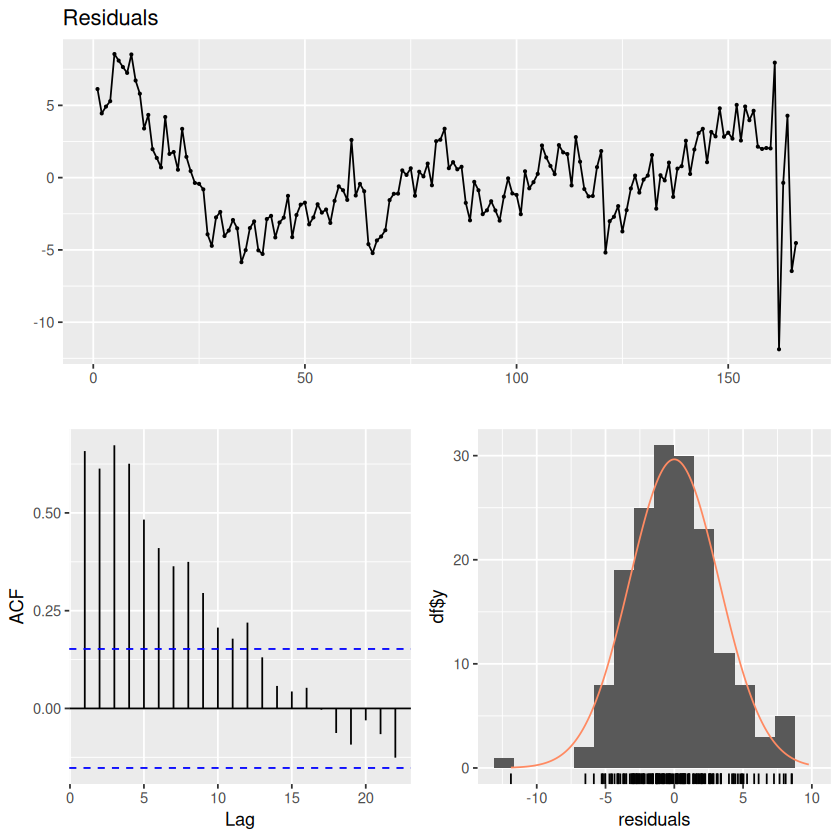

In [33]:
checkresiduals(regression_model) # residual analysis

In [34]:
res <- residuals(regression_model) # residuals of the fitted model

In [38]:
arima_model <- auto.arima(res) # fit an ARIMA model on residuals of regression model
summary(arima_model)

Series: res 
ARIMA(3,1,2) 

Coefficients:
          ar1      ar2      ar3      ma1     ma2
      -0.3748  -0.8653  -0.3685  -0.3668  0.7275
s.e.   0.1291   0.0909   0.1225   0.1235  0.0801

sigma^2 = 3.949:  log likelihood = -345.87
AIC=703.75   AICc=704.28   BIC=722.38

Training set error measures:
                      ME     RMSE      MAE       MPE     MAPE      MASE
Training set -0.09298762 1.951044 1.279325 -3.042923 119.3644 0.8149792
                    ACF1
Training set -0.02499008

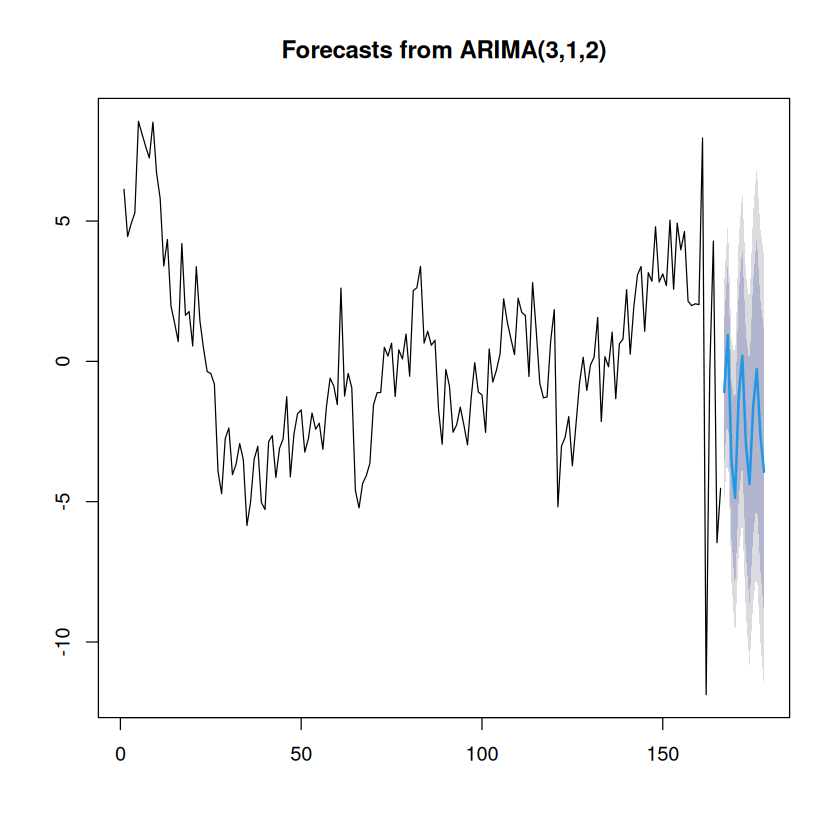

In [39]:
fcast <- forecast(arima_model, h = 12) # forecast over 3 years
plot(fcast)

### Regression Model Excluding Variables Corresponding to Economic Crises

In [24]:
regression_model_w_crisis <- lm(PIB ~ X + t + T1 + T2 + T3, data = data) # fit a linear regression model
summary(regression_model_w_crisis) 


Call:
lm(formula = PIB ~ X + t + T1 + T2 + T3, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.6513  -2.4433   0.0703   2.4594   8.4465 

Coefficients: (1 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.367253   0.789095  53.691  < 2e-16 ***
X                  NA         NA      NA       NA    
t            0.434716   0.006171  70.447  < 2e-16 ***
T1          -2.343913   0.836407  -2.802  0.00570 ** 
T2          -1.162737   0.836385  -1.390  0.16639    
T3          -2.453468   0.841431  -2.916  0.00405 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.81 on 161 degrees of freedom
Multiple R-squared:  0.9687,	Adjusted R-squared:  0.9679 
F-statistic:  1245 on 4 and 161 DF,  p-value: < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 109.86, df = 10, p-value < 2.2e-16


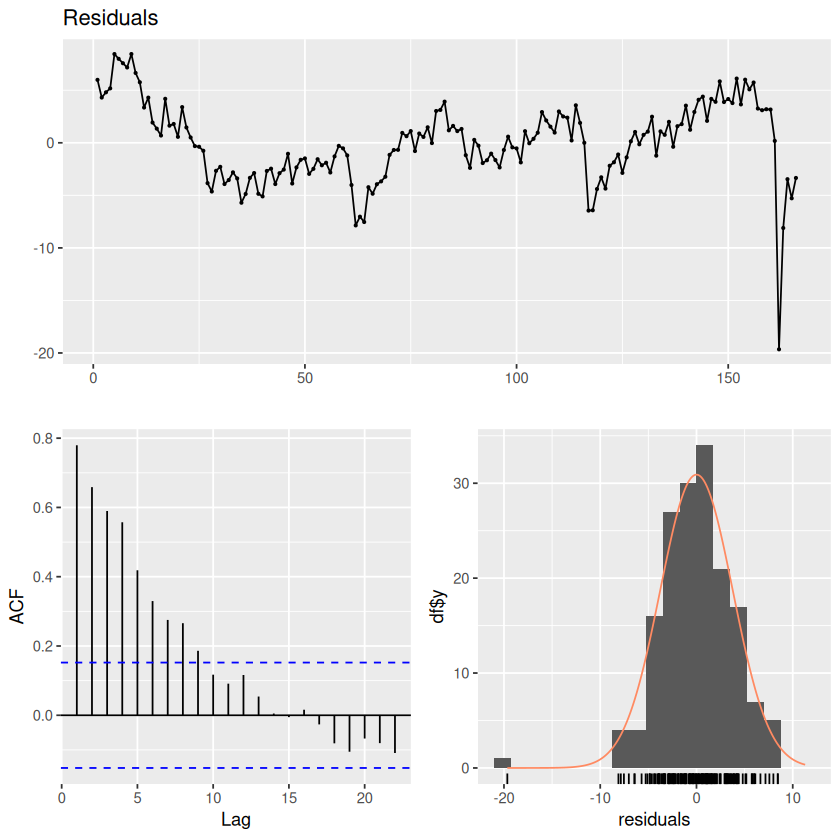

In [25]:
checkresiduals(regression_model_w_crisis) # residual analysis

In [26]:
res <- residuals(regression_model_w_crisis) # residuals of the fitted model

In [27]:
arima_model <- auto.arima(res) # fit an ARIMA model on residuals of regression model
summary(arima_model)

Series: res 
ARIMA(1,0,1) with zero mean 

Coefficients:
         ar1      ma1
      0.8825  -0.2541
s.e.  0.0487   0.1078

sigma^2 = 5.254:  log likelihood = -372.77
AIC=751.53   AICc=751.68   BIC=760.87

Training set error measures:
                      ME     RMSE      MAE       MPE   MAPE      MASE
Training set -0.04827919 2.278282 1.360811 -313.6609 478.64 0.9152317
                   ACF1
Training set 0.01443228

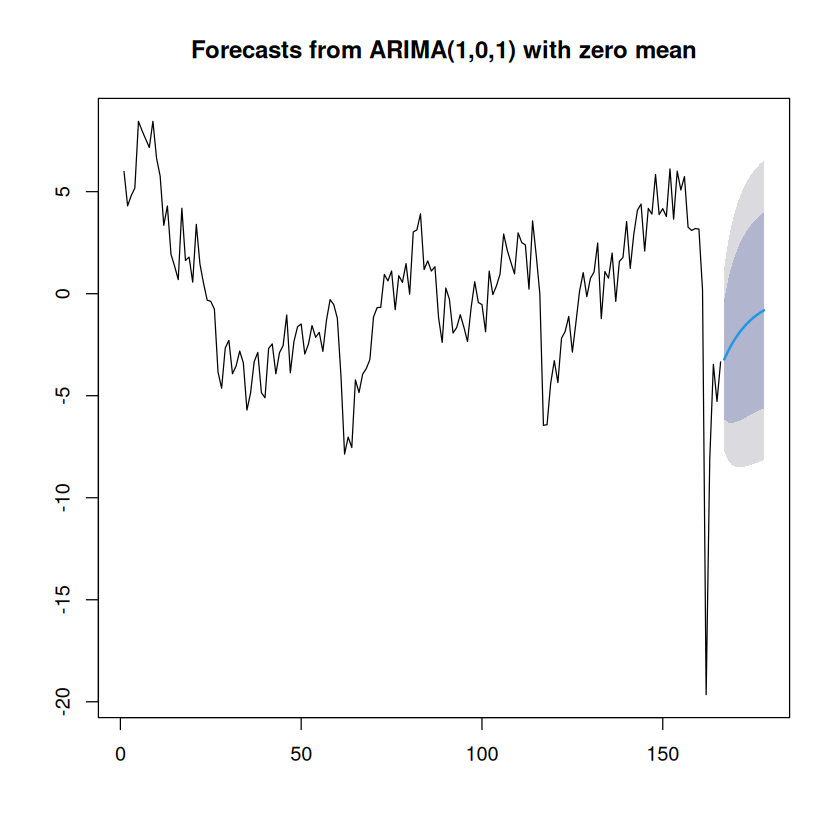

In [28]:
fcast <- forecast(arima_model, h = 12) # forecast over 3 years
plot(fcast)

### Model Comparison

The regression model considering the economic crises has a slightly higher **R-squared** value, which indicates that the variance explained is better compared to the second model, which does not account for the economic crises.

Considering the crises helps explain the relationships more effectively, as seen in the model summary. It is important to note that the exclusion of these variables results in a well-fitting model but may overlook additional factors influencing the GDP.

The graphs show that the ARIMA model fitted for the regression model considering the economic crises has greater variability compared to the model that excludes these variables, which aligns with the previous statement.

***

MSc Statistical Computing by Mathematics Research Center (CIMAT Monterrey)

September 2024